In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
dataset= "https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data"

In [3]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sukrutmayekar
Your Kaggle Key: ········


  0%|                                                                                      | 0.00/15.1M [00:00<?, ?B/s]

100%|█████████████████████████████████████████████████████████████████████████████| 15.1M/15.1M [00:05<00:00, 2.99MB/s]



Extracting archive .\competitive-data-science-predict-future-sales/competitive-data-science-predict-future-sales.zip to .\competitive-data-science-predict-future-sales


In [4]:
data_dir= ".\competitive-data-science-predict-future-sales/competitive-data-science-predict-future-sales.zip to .\competitive-data-science-predict-future-sales"

In [5]:
test=pd.read_csv("test.csv")
shops=pd.read_csv("shops.csv")
item_categories=pd.read_csv("item_categories.csv")
items=pd.read_csv("items.csv")
train=pd.read_csv(r"sales_train.csv", parse_dates= ["date"], infer_datetime_format=True, dayfirst=True)

In [3]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [4]:
print("Test: ",test.shape)
print("Shops: ",shops.shape)
print("Items: ",items.shape)
print("Item Categories: ",item_categories.shape)

Test:  (214200, 3)
Shops:  (60, 2)
Items:  (22170, 3)
Item Categories:  (84, 2)


In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [6]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
shops.sample(10)

,shop_name,shop_id
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
43,"СПб ТК ""Сенная""",43
48,"Томск ТРЦ ""Изумрудный Город""",48
32,"Москва ТЦ ""Серебряный Дом""",32
35,"Н.Новгород ТРЦ ""Фантастика""",35
31,"Москва ТЦ ""Семеновский""",31
13,"Казань ТЦ ""Бехетле""",13
16,"Коломна ТЦ ""Рио""",16
36,"Новосибирск ТРЦ ""Галерея Новосибирск""",36
14,"Казань ТЦ ""ПаркХаус"" II",14


In [8]:
shops.dtypes

shop_name    object
shop_id       int64
dtype: object

In [9]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [11]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [13]:
print("No. of null values in train: ",train.isnull().sum().sum())
print("No. of null values in test: ",test.isnull().sum().sum())
print("No. of null values in items: ",items.isnull().sum().sum())
print("No. of null values in item categories: ",item_categories.isnull().sum().sum())
print("No. of null values in shops: ",shops.isnull().sum().sum())

No. of null values in train:  0
No. of null values in test:  0
No. of null values in items:  0
No. of null values in item categories:  0
No. of null values in shops:  0


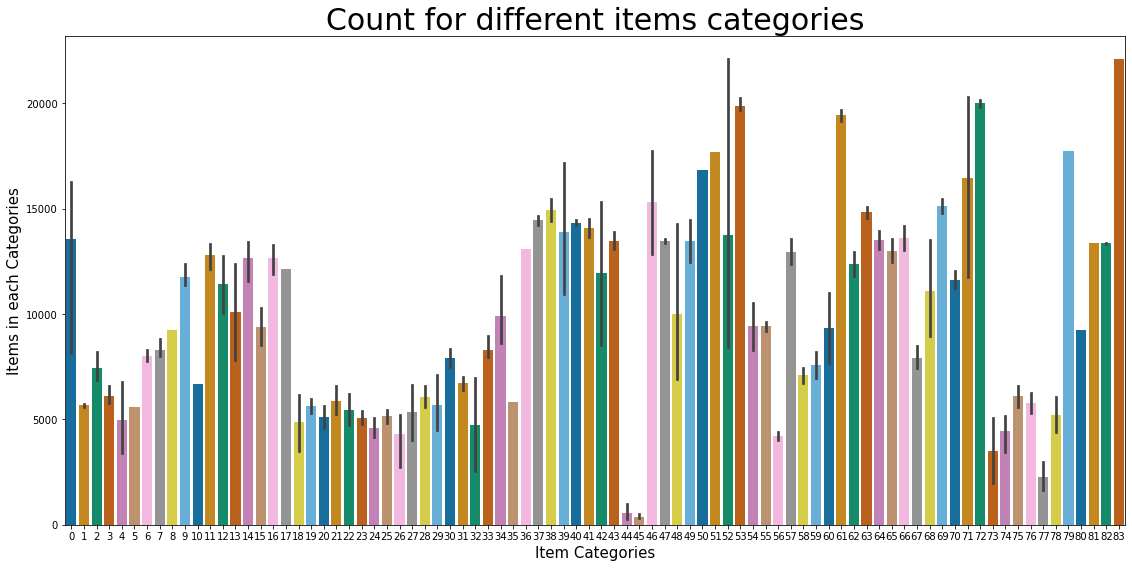

In [14]:
plt.figure(figsize=(19,9))
sns.barplot(items["item_category_id"],items["item_id"],data=items,palette="colorblind")
plt.title("Count for different items categories",fontsize=30)
plt.xlabel('Item Categories', fontsize = 15)
plt.ylabel('Items in each Categories', fontsize = 15)
plt.show()

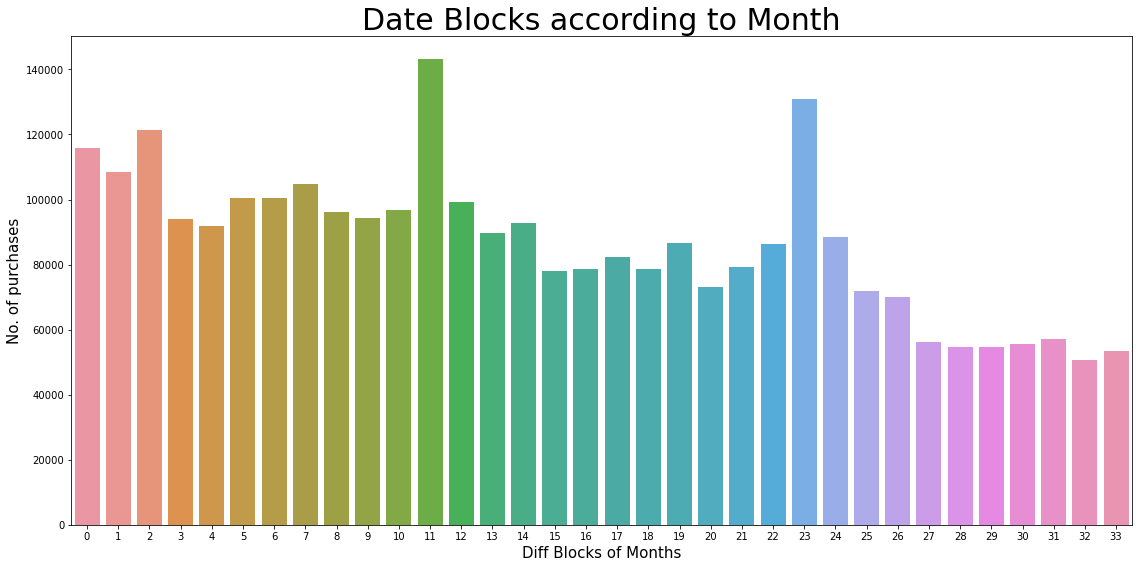

In [15]:
plt.figure(figsize=(19,9))
sns.countplot(train["date_block_num"])
plt.title("Date Blocks according to Month",fontsize=30)
plt.xlabel("Diff Blocks of Months",fontsize=15)
plt.ylabel("No. of purchases",fontsize=15)
plt.show()

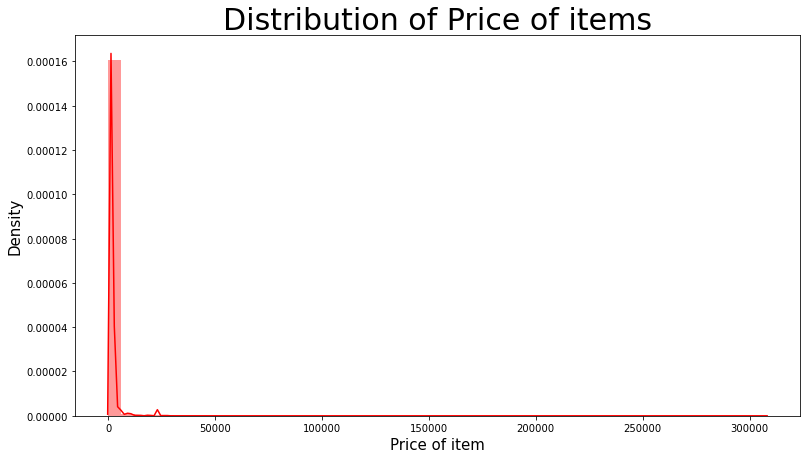

In [16]:
plt.figure(figsize=(13,7))
sns.distplot(train["item_price"],color="red")
plt.title("Distribution of Price of items",fontsize=30)
plt.xlabel("Price of item",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

# Having a look at the distribution of items sold per day

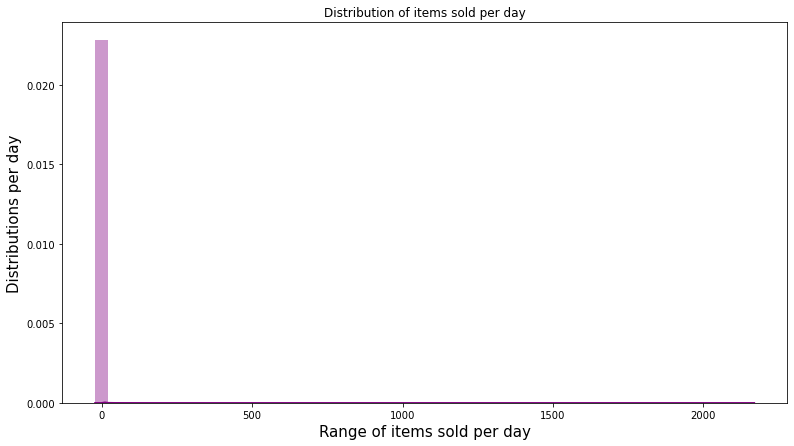

In [17]:
plt.rcParams["figure.figsize"]=(13,7)
sns.distplot(train["item_cnt_day"],color="Purple")
plt.title("Distribution of items sold per day")
plt.xlabel("Range of items sold per day",fontsize=15)
plt.ylabel("Distributions per day",fontsize=15)
plt.show()

In [18]:
# checking the no. of unique item present in the stores
x=train["item_id"].nunique() #Prints the unique value(scalar) value of all the distributed values in column
print("No. of unique items present in stores: ",x) #unique means the items that appear in a dataset only once

No. of unique items present in stores:  21807


In [19]:
# checking the no. of unique item present in the stores
x=item_categories["item_category_id"].nunique()
print("No. of unique categories present in stores: ",x)

No. of unique categories present in stores:  84


In [20]:
# checking the no. of unique shops given in the dataset
x=train["shop_id"].nunique()
print("No. of unique shops present in dataset: ",x)

No. of unique shops present in dataset:  60


In [21]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

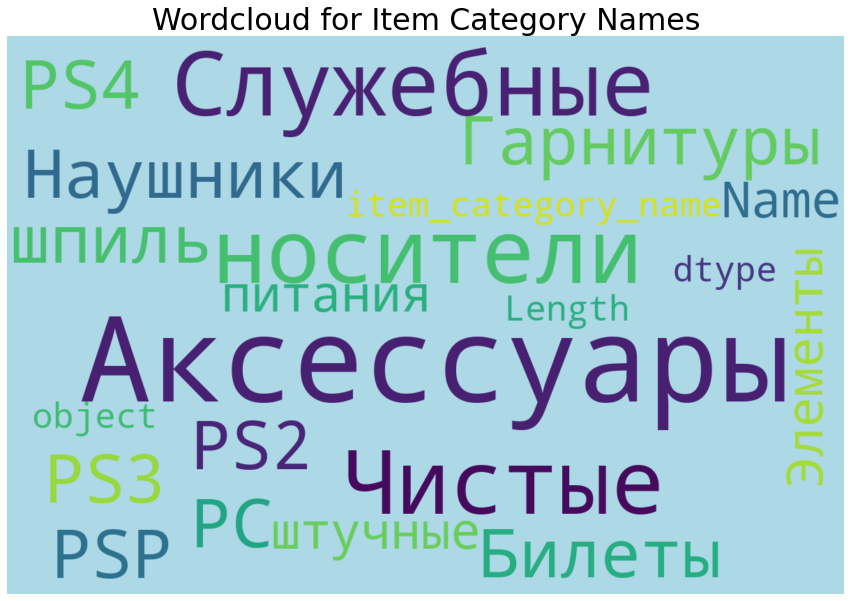

In [22]:
plt.rcParams["figure.figsize"]=(15,12)
stopwords= set(STOPWORDS)
wordcloud=  WordCloud(background_color="lightblue",
                   max_words=200,
                   stopwords=stopwords,
                   width=1200,
                   height=800,
                   random_state=42).generate(str(item_categories["item_category_name"]))
plt.title("Wordcloud for Item Category Names",fontsize=30)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

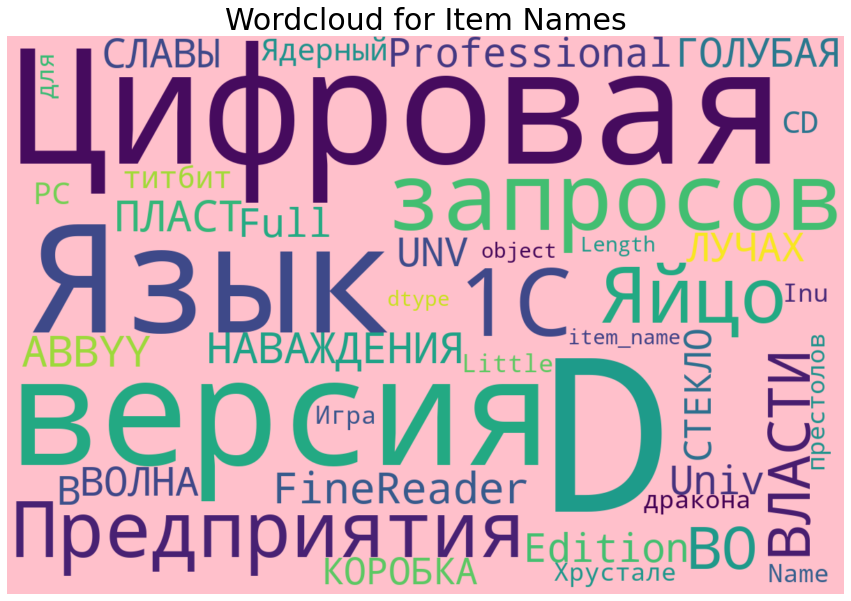

In [23]:
plt.rcParams["figure.figsize"]=(15,12)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color="pink",
                   max_words=200,
                   stopwords=stopwords,
                   width=1200,
                   height=800,
                   random_state=42).generate(str(items["item_name"]))
plt.title('Wordcloud for Item Names', fontsize = 30)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

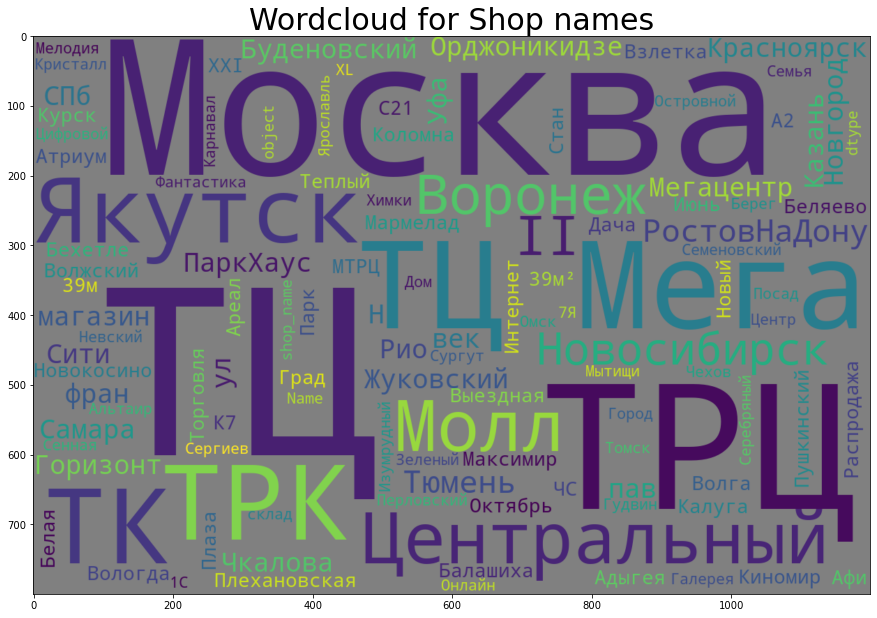

In [24]:
plt.rcParams["figure.figsize"]=(15,12)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(background_color="gray",
                   max_words=200,
                   stopwords=stopwords,
                   width=1200,
                   height=800,
                   random_state=42).generate(str(shops["shop_name"]))
plt.title("Wordcloud for Shop names", fontsize=30)
plt.axis=("off")
plt.imshow(wordcloud, interpolation="bilinear")

In [25]:
#Extracting date of days
train["day"] = train["date"].dt.day
#Extracting date of months
train["month"] = train["date"].dt.month
#Extracting date of years
train["year"] = train["date"].dt.year
#Extracting date of weeks
train["week"] = train["date"].dt.week
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

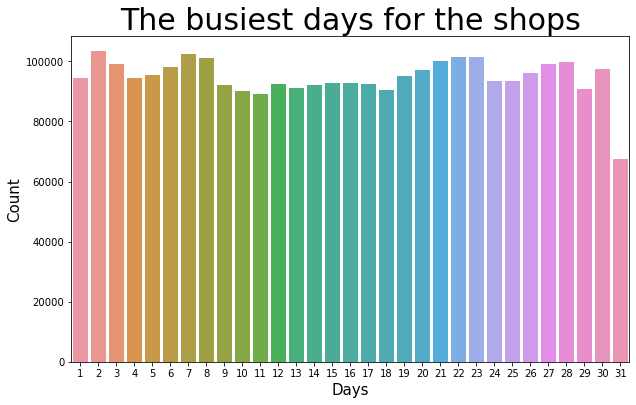

In [26]:
# checking which days are most busiest for the shops
plt.figure(figsize=(10,6))
sns.countplot(train["day"])
plt.title("The busiest days for the shops", fontsize=30)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

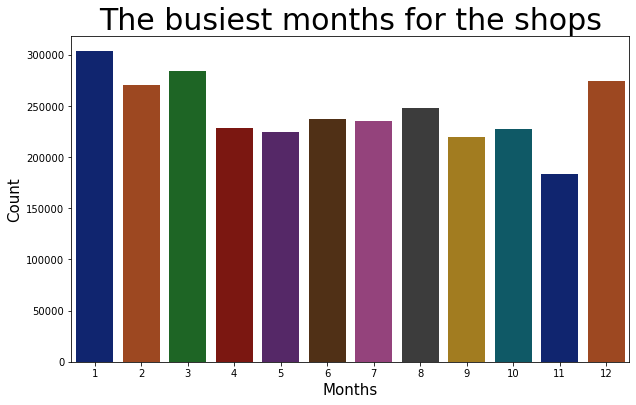

In [27]:
# checking which months are most busiest for the shops
plt.figure(figsize=(10,6))
sns.countplot(train["month"], palette="dark")
plt.title("The busiest months for the shops", fontsize=30)
plt.xlabel("Months", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

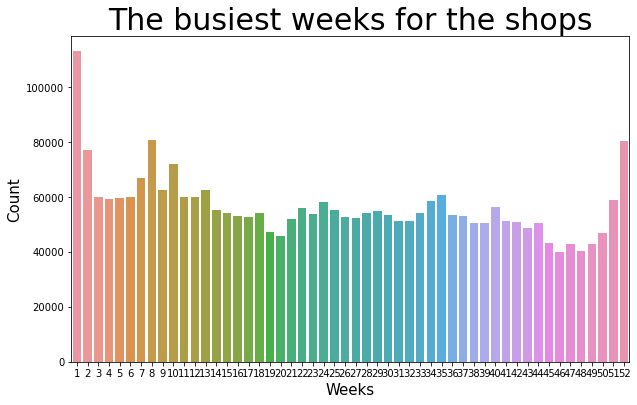

In [28]:
# checking which weeks are most busiest for the shops
plt.figure(figsize=(10,6))
sns.countplot(train["week"])
plt.title("The busiest weeks for the shops", fontsize=30)
plt.xlabel("Weeks", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

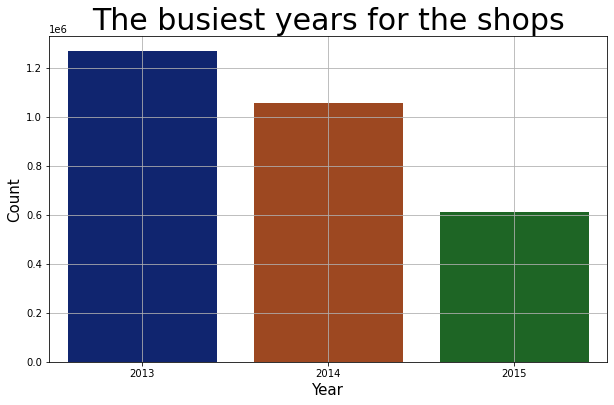

In [29]:
# checking which Years are most busiest for the shops
plt.figure(figsize=(10,6))
sns.countplot(train["year"], palette="dark")
plt.title("The busiest years for the shops", fontsize=30)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.grid()
plt.show()

In [30]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

# Feature Engineering

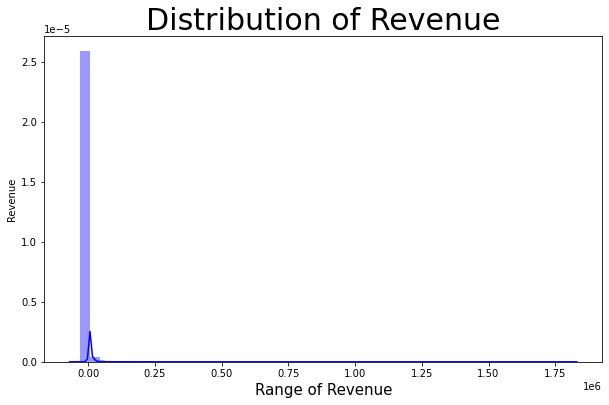

In [31]:
plt.figure(figsize=(10,6))
train["revenue"]=train["item_price"] * train["item_cnt_day"]
sns.distplot(train["revenue"], color="blue")
plt.title("Distribution of Revenue", fontsize = 30)
plt.xlabel('Range of Revenue', fontsize = 15)
plt.ylabel("Revenue")
plt.show()

In [32]:
train.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
day                        int64
month                      int64
year                       int64
week                       int64
revenue                  float64
dtype: object

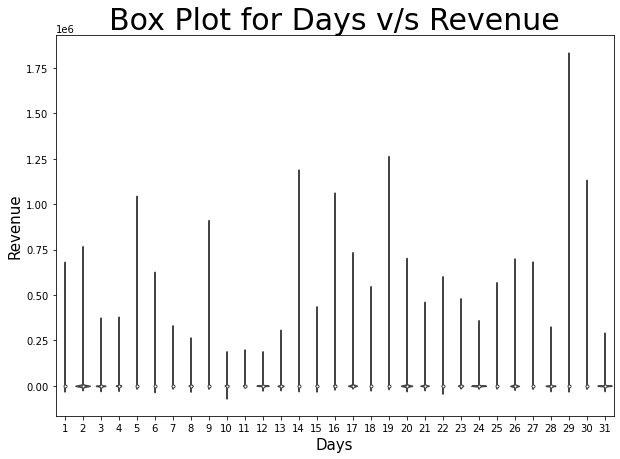

In [33]:
#Plotting a box plot for item price per item_cnt_day
plt.figure(figsize=(10,7))
sns.violinplot(x= train["day"],y= train["revenue"])
plt.title("Box Plot for Days v/s Revenue", fontsize= 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

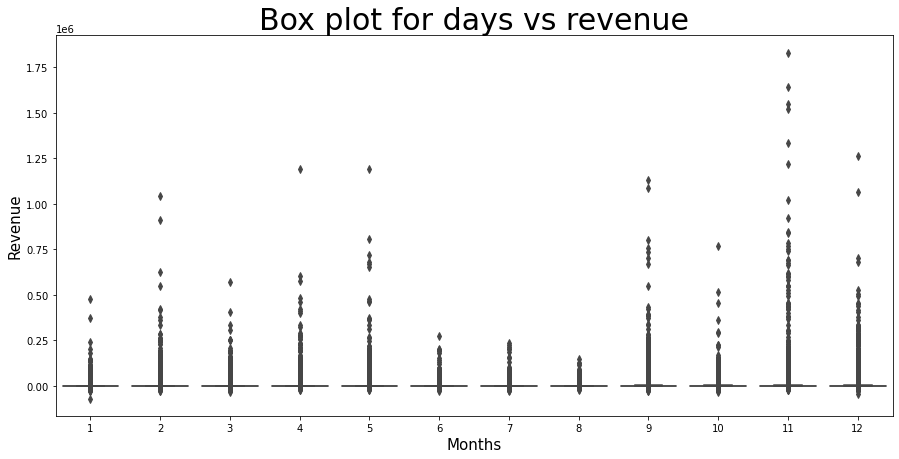

In [34]:
#Plotting a box plot for item price and item_cnt per day
plt.rcParams["figure.figsize"]=(15,7)
sns.boxplot(x= train["month"],y =train["revenue"])
plt.title("Box plot for days vs revenue", fontsize=30)
plt.xlabel("Months", fontsize=15)
plt.ylabel("Revenue", fontsize=15)
plt.show()

In [35]:
#Converting the data into monthly sales data

# making a dataset with only monthly sales data
data=train.groupby([train["date"].apply(lambda x: x.strftime("%Y-%m")),"item_id","shop_id"]).sum().reset_index()

# specifying the important attributes which we want to add to the data
data=data[["date","item_id","shop_id","item_cnt_day"]]

# at last we can select the specific attributes from the dataset which are important 
data=data.pivot_table(index=["item_id","shop_id"],columns="date", values="item_cnt_day", fill_value=0).reset_index()

data.shape

(424124, 36)

In [36]:
# let's merge the monthly sales data prepared to the test data set
test= pd.merge(test, data, on= ["item_id","shop_id"], how = "left")

# filling the empty values found in the dataset
test.fillna(0, inplace= True)

#Checking the Dataset
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Now lets create the actual training data
x_train= test.drop(["2015-10", "item_id", "shop_id"], axis=1)
y_train=test["2015-10"]

#Deleting the first column so that it can predict the future sales data
x_test= test.drop(["2013-01","item_id","shop_id"], axis=1)

#Checking the shapes of the dataset
print("Shapes of x_train: ",x_train.shape)
print("Shapes of y_test: ",x_train.shape)
print("Shapes of x_test: ",x_train.shape)

Shapes of x_train:  (214200, 34)
Shapes of y_test:  (214200, 34)
Shapes of x_test:  (214200, 34)


In [38]:
x_train.head()

,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
x_test.head()

,ID,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting the data into train and valid dataset

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=0.2, random_state=0)


#Checking the shapes
print("Shape of X Train: ",x_train.shape)
print("Shape of X Test: ",x_valid.shape)
print("Shape of Y Train: ",y_train.shape)
print("Shape of Y Test: ",y_valid.shape)

Shape of X Train:  (171360, 34)
Shape of X Test:  (42840, 34)
Shape of Y Train:  (171360,)
Shape of Y Test:  (42840,)


# Modelling

In [41]:
from lightgbm import LGBMRegressor
model_lgb= LGBMRegressor(n_estimators=200,
                        learning_rate=0.03,
                        num_leaves=32,
                        colsample_bytree=0.9497036,
                        subsample=0.8715623,
                        max_depth=8,
                        reg_alpha=0.04,
                        reg_lambda=0.073,
                        min_split_gain=0.0222415,
                        min_child_weight=40)
model_lgb.fit(x_train, y_train)
y_pred_lgb= model_lgb.predict(x_test)

# Get the test set predictions and clip values to the specified range

In [42]:
y_pred_lgb= model_lgb.predict(x_test).clip(0.,20.)
# Create the submission file and submit
preds=pd.DataFrame(y_pred_lgb, columns= ["item_cnt_month"])
preds.to_csv("submission.csv",index_label="ID")